## test simg


### JAH, June 2021

In [4]:
%matplotlib inline
#%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [8]:
import numpy             as np
import scipy.ndimage     as ndimg

import matplotlib.pyplot as plt

import clouds.utils      as cu

import clouds.simg       as  simg
import clouds.rimg       as  rimg

import clouds.test_simg  as tsimg
import clouds.test_rimg  as trimg

#import clouds.sclouds    as sclouds
#import clouds.dclouds    as dclouds
from   clouds.pclouds    import fig, efig, ax3d, scatter, voxels, quiver
#import clouds.testclouds as tclouds

import clouds.sources      as sources

#import clouds.test_sources as tsources
#import clouds.test_sclouds as tsclouds
#import clouds.test_dclouds as tdclouds

In [9]:
plt.rcParams['image.cmap'] = 'rainbow'

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Tue Jun 29 15:28:24 2021


### Test simg basic

In [53]:
tsimg.test_gradient()
tsimg.test_hessian()
tsimg.test_det_hessian()
tsimg.test_curvature()
tsimg.test_curvatures()
tsimg.test_laplacian()
tsimg.test_min_curvature()
tsimg.test_min_transverse_curvature()

dir  0 0.9999999999999986 1
dir  1 -0.9999999999999986 -1
hess [ 0 0 ] =  1.0 , mean  1.0000000000000377
hess [ 0 1 ] =  0.0 , mean  0.0
hess [ 1 0 ] =  0.0 , mean  0.0
hess [ 1 1 ] =  -1.0 , mean  -1.0000000000000377
det hessian =  -1.0 , mean  -1.0000000000000757
 curvature i  [0. 1.]  curv0  -0.5 mean curv -0.5000000000000098
 curvature i  [1. 0.]  curv0  0.5 mean curv 0.5000000000000098
sum curvatures  -0.500000000000117 , lap  -0.5
laplacian =  0.0 , mean  0.0
 min curv  -1.0 , min curv  -1.0000000000000195
 i-coor  0  edir  0.0 0.0
 i-coor  1  edir  1.0 1.0
 min transv curv0  -1.0 , min curv  -1.0000000000000195
 mag 1.0


### test simg filters

In [81]:
tsimg.test_edge_filter()
tsimg.test_ridge_lambda_filter()
tsimg.test_ridge_filter()
tsimg.test_node_filter()
tsimg.test_blob_filter()
tsimg.test_nlap_scan()

mean  39.5 40
mean  39.5 40
ridge lambda :  4.009900990099012 4
ridge :  4.00990099009901 4
node filter : 2 2
blob filter : 2 2
nlap scan : mean  1.739432209942763 std 0.07672763490674438


### test rimg basic

In [56]:
trimg.test_gradient()
trimg.test_curvature()
trimg.test_curvatures()
trimg.test_min_curvature()
trimg.test_laplacian()
trimg.test_min_curvature()
trimg.test_transverse_curvature()
trimg.test_min_transverse_curvature()

 vgrad  1.4142135623731011 1.4142135623730951
 grad [ 0 ] 1.0 1
 grad [ 1 ] 1.0 1
True 4
curve  0.5  mean  0.5000000000000613
curve  0.5  mean  0.5000000000000062
curve  0.5  mean  0.49999999999998834
curve  0.5  mean  0.5000000000000613
False 2
curve  0.5  mean  0.5000000000000613
curve  0.5  mean  0.5000000000000613
 curv0  -1.0 , min curv  -1.000000000000048
 i-coor  0  edir  0 0.0
 i-coor  1  edir  1 1.0
lap0 2.0  mean lap  2.0000000000001172
lap0 1.0  mean lap  1.0000000000001226
 curv0  -1.0 , min curv  -1.000000000000048
 i-coor  0  edir  0 0.0
 i-coor  1  edir  1 1.0
edir  [1 0]  curvt0  0.5  mean curv  0.5000000000003642
edir  [1 1]  curvt0  0.5  mean curv  0.5000000000002225
edir  [ 1 -1]  curvt0  0.5  mean curv  0.5000000000002238
edir  [0 1]  curvt0  0.5  mean curv  0.5000000000003642
 curv0  -0.5 , min curv  -0.5000000000000817
 i-coor  0  edir  0 0.0
 i-coor  1  edir  1 1.0


### Test rimg filters

In [87]:
trimg.test_edge_filter()
trimg.test_ridge_lambda_filter()
trimg.test_ridge_filter()
trimg.test_node_filter()
trimg.test_blob_filter()
trimg.test_nlap_scan()

edge: mean  38.975103734439834 40
edge: mean  38.975103734439834 40
ridge lambda :  4.009900990099012 4
ridge :  4.009900990099012 4
node filter : 2 2
blob filter : 2 2
nlap scal: nmean  1.7283415450359247 std 0.1378135345088978


(<matplotlib.axes._subplots.AxesSubplot at 0x116a61990>, None)

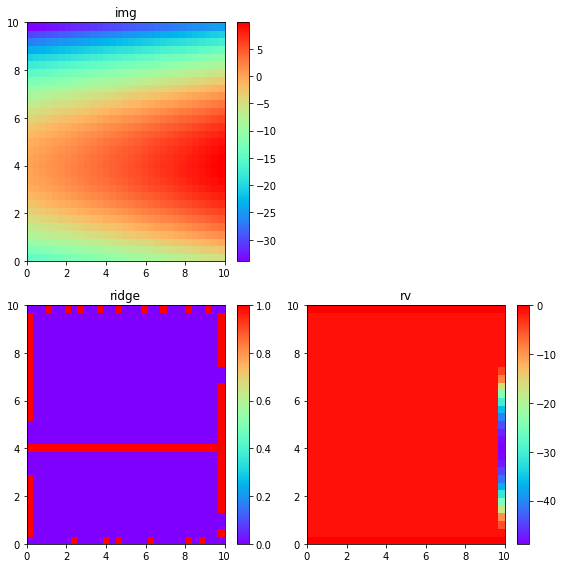

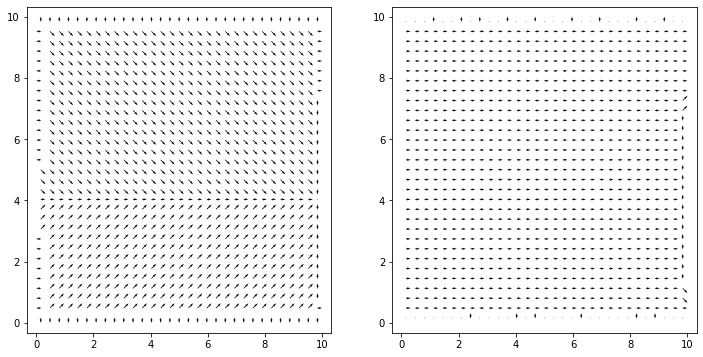

In [74]:
nbins  = 31
ranges = ((0, 10), (0, 10))
y0     = 4
atol   = 5e-2
nborder = 2
    
fun    = lambda x : x[0] - (x[1] - y0)**2

img, bins = sources.from_function(fun, nbins, ranges)
steps     = [bin[1] - bin[0] for bin in bins]
ymesh     = cu.ut_mesh(bins)

xfil, rv  = rimg.ridge_filter(img, steps)
center    = tuple([[nborder, -nborder] for i in range(ndim)])
xi = [x[1] for x in np.argwhere(xfil == True)]

sel = np.full(xfil.shape, True)
for i in range(ndim):
    sel = (sel) & (ymesh[i] > bins[i][nborder]) & (ymesh[i] < bins[i][-nborder])
    
grad, gdir = rimg.gradient(img, steps) 
curv, edir = rimg.min_transverse_curvature(img, steps)
        
#print(ymesh[1][xfil & sel])
    
#print('ridge : ', np.mean(ymesh[xfil == True]), y0)

fig(2, 2)
plt.subplot(2, 2, 1); voxels(img , bins) ; plt.title('img')
plt.subplot(2, 2, 3); voxels(xfil, bins); plt.title('ridge')
plt.subplot(2, 2, 4); voxels(rv  , bins)  ; plt.title('rv');
efig();

fig(1, 2, 6)
plt.subplot(1, 2, 1), quiver(grad, gdir, bins)
plt.subplot(1, 2, 2), quiver(curv, edir, bins)

In [20]:
nbins   = 51
ranges  = ((-1, 1), (-1, 1))
b       = (-2, -1)
c       = (-1,)
atol    = 5e-2
nborder = 2
    
ndim          = len(b)  
assert len(ranges) == ndim, 'not valid number of ranges'
    
fun, _, hess  = sources.taylor(b = b, c = c)
img, bins     = sources.from_function(fun, nbins, ranges)
img          +=  1 - np.min(img) 
steps         = cu.ut_steps(bins)
center = tuple([[nborder, -nborder] for i in range(ndim)])

curv0, edir0 = trimg._dcurv_trans_min(hess, steps)
curv , edir  =  rimg.min_transverse_curvature(img, steps)
    
print(' curv0 ', curv0, ', min curv ', np.mean(curv[center]))
for i in range(ndim):
    print(' i-coor ', i, ' edir ', edir0[i], np.mean(edir[i][center]))

 curv0  -1.25 , min curv  -1.2499999999999893
 i-coor  0  edir  1 1.0
 i-coor  1  edir  -1 -1.0


In [ ]:
npoints = 2
sigma   = 2
img, points = sources.points(npoints = npoints)
ximg        = ndimg.gaussian_filter(img, sigma) if sigma > 0 else img 
    
mask        = ximg > 0
xfil        = simg.blob_filter(ximg, mask = mask)
    
fig(1, 2)
plt.subplot(1, 2, 1); voxels(ximg); plt.title('s img')
plt.subplot(1, 2, 2); voxels(xfil); plt.title('filter')

img = img.astype(bool)

In [ ]:
lap, _ = simg.normal_laplacian(ximg, 2 * sigma)
sigmas = np.linspace(0, 4, 10)
sigmax, lapmax, laps = simg.nlap_scan(ximg, sigmas)
tsimg.test_nlap_scan()

In [ ]:
ndim   = len(ranges)
y0     = 4
fun    = lambda x : x[0] - (x[1] - y0)**2
ranges = ((0, 10), (0, 10))
nbins  = 81

img, bins = sources.from_function(fun, nbins, ranges)
steps     = [bin[1] - bin[0] for bin in bins]
center    = tuple([[nborder, -nborder] for i in range(ndim)])

fig(2, 2)
plt.subplot(2, 2, 1); voxels(img, bins); plt.title('img');


ndim  = img.ndim
shape = img.shape
mask  = np.full(shape, True)

grad, gdir = simg.gradient(img, steps) 
curv0, edir = simg.min_transverse_curvature(img, steps)
sel0 = curv0 < 0
print('sel 0', np.sum(sel0))


hess  = simg.hessian(img, steps)
print(hess.shape, edir.shape, gdir.shape)

ndim = img.ndim
curv = np.zeros(img.shape)
for i in range(ndim):
    for j in range(ndim):
        curv += hess[i, j] * edir[i] * edir[j]
print(curv.shape)

xsel = mask
ls   = simg.transverse_curvatures(img, edir, steps)

fig(1, 2)
plt.subplot(1, 2, 1); voxels(curv0); plt.title('min curv t')
plt.subplot(1, 2, 2); voxels(ls[0]); plt.title('curv t')

print(len(ls))
for li in ls:
    xsel = (xsel) & (li < 0)
    print(np.sum(xsel))
#    xsel = (xsel) & (ls[i] < 0)
#    xsel = (xsel) & (np.abs(ls[-2]) > ls[-1])
#    cond = np.isclose(np.abs(np.sum(gdir * edir, axis = 0)), 1, atol = atol)
#    xsel = (xsel) & (cond)
        

xfil, rv = simg.ridge_filter(img, steps)
    

fig(1, 2)
plt.subplot(1, 2, 1); voxels(xfil); plt.title('ridge filter')
plt.subplot(1, 2, 2); voxels(rv); plt.title('rv')

In [ ]:
ndim   = len(ranges)
y0     = 4
fun    = lambda x : x[0] - (x[1] - y0)**2
ranges = ((0, 10), (0, 10))
nbins  = 81

img, bins = sources.from_function(fun, nbins, ranges)
steps     = [bin[1] - bin[0] for bin in bins]
center    = tuple([[nborder, -nborder] for i in range(ndim)])

fig(2, 2)
plt.subplot(2, 2, 1); voxels(img, bins); plt.title('img');

grad, gdir = simg.gradient(img, steps) 
curv, edir = simg.min_curvature(img, steps)
plt.subplot(2, 2, 2); voxels(curv, bins); plt.title('min curv');

xfil, rv   = simg.ridge_lambda_filter(img, steps)

plt.subplot(2, 2, 3); voxels(xfil, bins); plt.title('ridge filter');
plt.subplot(2, 2, 4); voxels(rv, bins)  ; plt.title('rv');

xi = [x[1] for x in np.argwhere(xfil == True)]
print(steps[1] * np.mean(xi), y0)
assert np.isclose(steps[1] * np.mean(xi), y0, atol = 5e-2), 'Not good ridge lambda'

#print(ls)

In [ ]:
ndim   = len(ranges)
fun    = lambda x : x[0] - (x[1] - y0)**2
ranges = ((0, 10), (0, 10))
nbins  = 81

img, bins = sources.from_function(fun, nbins, ranges)
steps     = [bin[1] - bin[0] for bin in bins]

center = tuple([[nborder, -nborder] for i in range(ndim)])

xfil, rv  = simg.ridge_filter(img, steps)

In [ ]:
nborder = 5

sigma  = 4
nbins  = 81
a0, a1 = -10, 10
y0     = 4
ranges = ((a0-1, a1 + 1), (0, 10))

img  = np.zeros((nbins, nbins))
n0  = int(nbins/2)
img[:, n0:] = 1


print(img.shape)
img =  ndimg.gaussian_filter(img, sigma)

fig(1, 2); 
plt.subplot(1, 2, 1); voxels(img); plt.title('img');

center = tuple([[nborder, -nborder] for i in range(ndim)])

for math in ('False', 'True'):
    xfil, rv  = simg.edge_filter(img, steps, math_condition = math, perc = 100, atol = 5e-1)
    fig(1, 3)
    plt.subplot(1, 3, 1); voxels(xfil); plt.title('edge fil');
    plt.subplot(1, 3, 2); voxels(rv)  ;plt.title('edge fil');
    plt.subplot(1, 3, 3); plt.hist(rv.flatten(), 100);
    
xi = [x[1] for x in np.argwhere(xfil == True)]
print('mean ', np.mean(xi), n0)
assert np.isclose(np.mean(xi), n0, 1)

In [ ]:
sigma  = 4
y0     = 4
fun    = lambda x : x[0] - (x[1] - y0)**2
ranges = ((0, 10), (0, 10))
nbins  = 81

img, bins = csources.from_function(fun, nbins, ranges)
steps     = [bin[1] - bin[0] for bin in bins]
simg      = ndimg.gaussian_filter(img, sigma)
xmesh     = cu.ut_mesh(bins)

xfil, rv  = sclouds.ridge_filter(simg, steps)


# make a 2D histogram
fig(2, 2)
plt.subplot(2, 2, 1); voxels(simg, bins); plt.title('sigma img')
plt.subplot(2, 2, 2);
ax1 = ax3d(2, 2, 2)
ax1.plot_surface(*xmesh, simg);
plt.xlabel('x'); plt.ylabel('y'); plt.title('sigma img');
plt.subplot(2, 2, 3); voxels(xfil, bins); plt.title('ridge filter');
plt.subplot(2, 2, 4); voxels(rv, bins); plt.title('rv');
efig();